In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Time,Sum of Playercount
968,8/8/2020,62712578
969,8/9/2020,63468860
970,8/10/2020,55025198
971,8/11/2020,54134381
972,8/12/2020,54291772


In [ ]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
968,8/8/2020,62712578
969,8/9/2020,63468860
970,8/10/2020,55025198
971,8/11/2020,54134381
972,8/12/2020,54291772


In [ ]:
df.drop(105,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
968,8/8/2020,62712578
969,8/9/2020,63468860
970,8/10/2020,55025198
971,8/11/2020,54134381
972,8/12/2020,54291772


In [ ]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Sales
Month,
2017-12-14,359489560
2017-12-15,411024096
2017-12-16,443528112
2017-12-17,417915489
2017-12-18,354798238


In [ ]:
df.describe()

,Sales
count,9.710000e+02
mean,1.536364e+08
std,1.089154e+08
min,1.292377e+07
25%,8.047632e+07
50%,1.115270e+08
75%,1.777408e+08
max,5.288538e+08


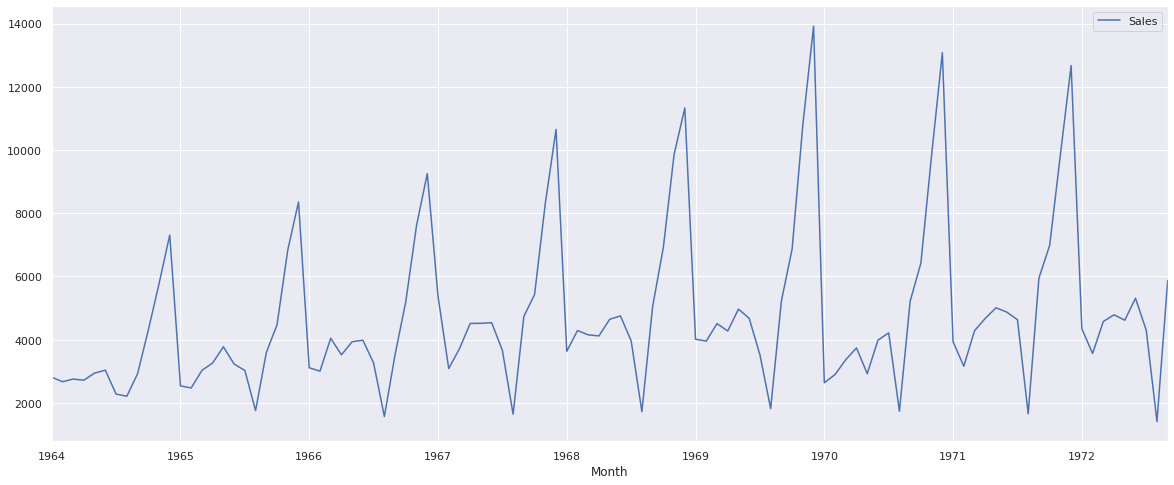

In [ ]:
df.plot(figsize=(20,8))

## SARIMA

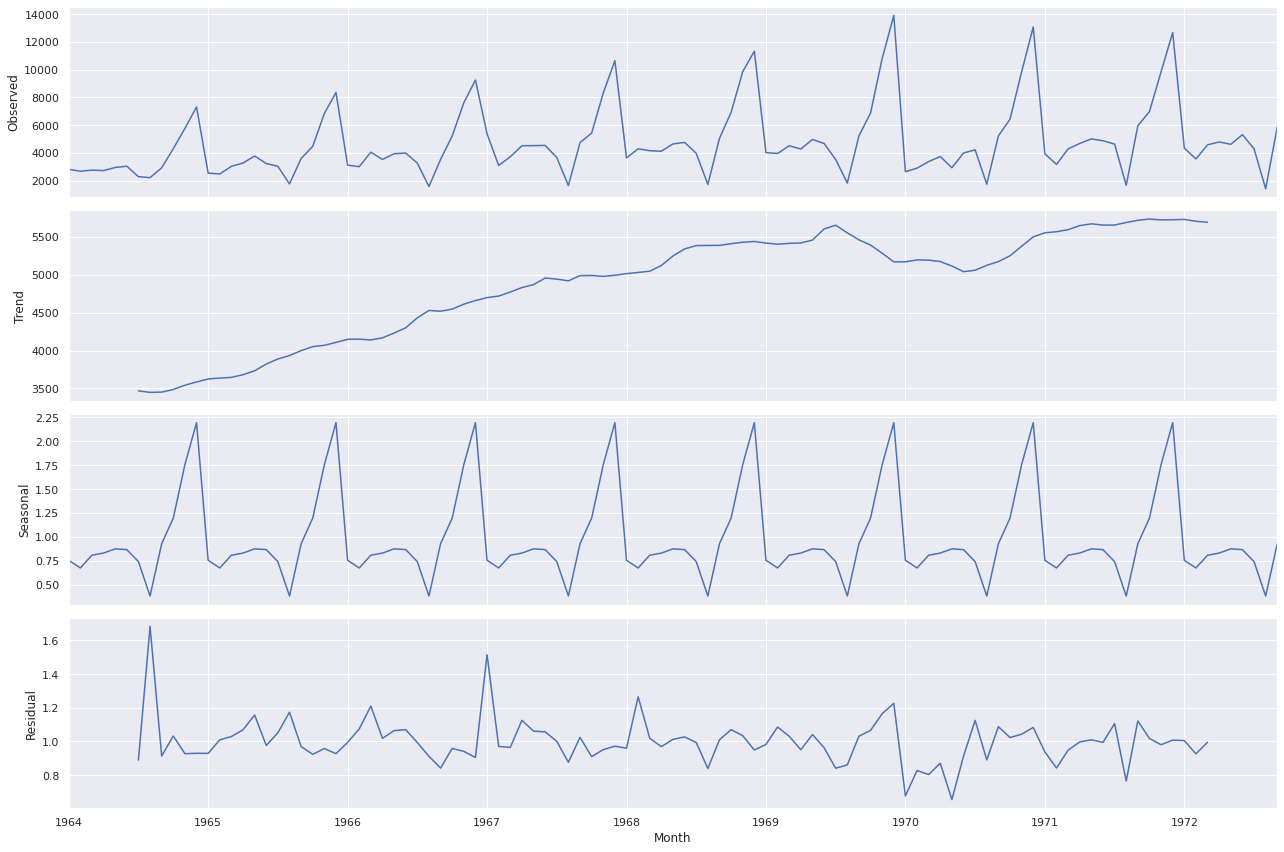

In [ ]:
import statsmodels as sm
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 12

decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative')
fig = decomposition.plot()
plt.show()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276228
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


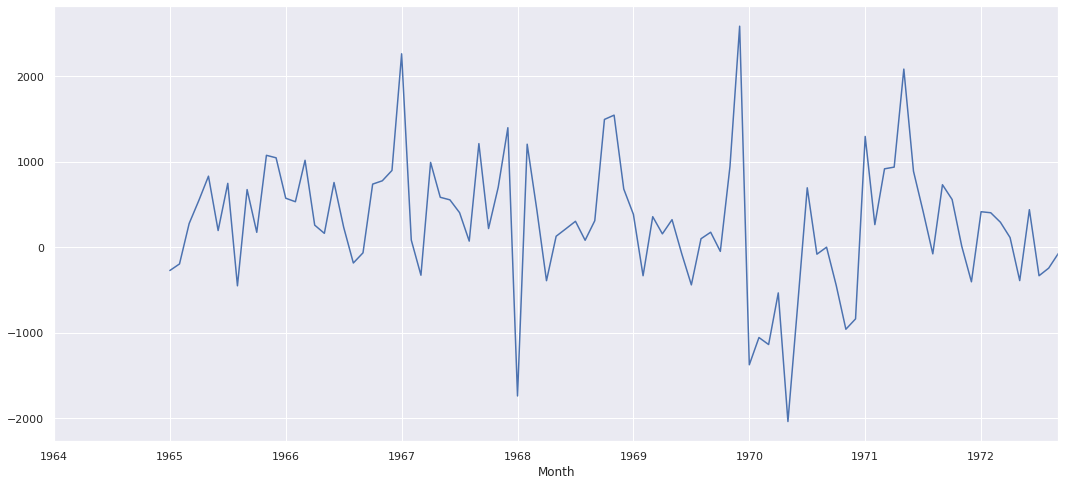

In [ ]:
df['Seasonal First Difference'].plot()

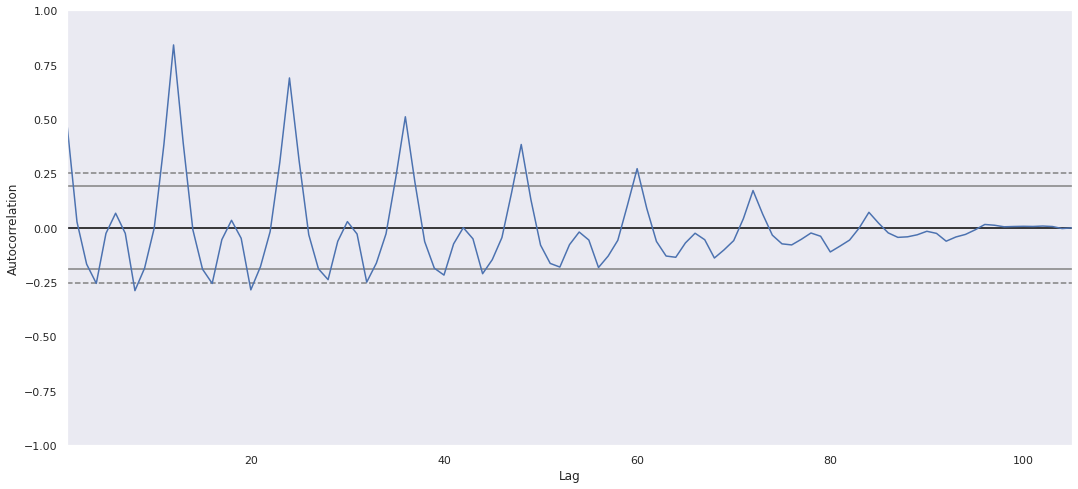

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm
import statsmodels.api as sm

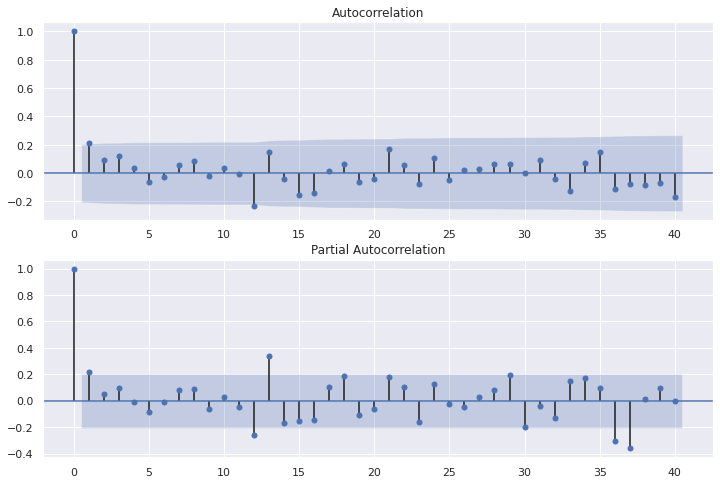

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
print(len(train_data), ',',len(test_data))

84 , 21


In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
pred2 = results.get_prediction(start=pd.to_datetime('1971-01-01'), dynamic=False)

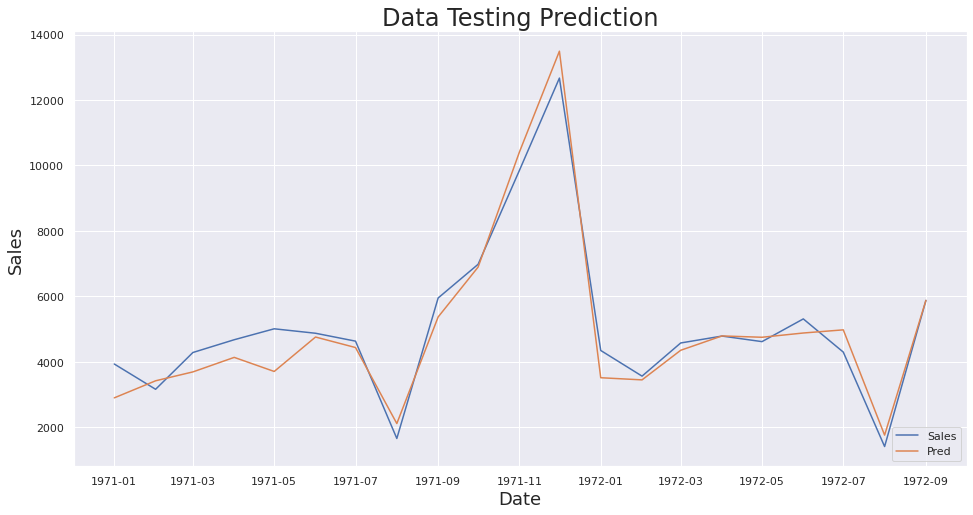

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data Testing Prediction', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.plot(test_data['Sales'])
plt.plot(pred2.predicted_mean)
plt.legend(['Sales', 'Pred'], loc='lower right')
plt.show()

In [ ]:
df3 = pd.DataFrame(pred2.predicted_mean)

In [ ]:
from google.colab import files
df3.to_csv('pred_sarima.csv')
files.download('pred_sarima.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#function to calculate MAPE dan RMSE
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100
def rmse(actual, pred):
    return np.sqrt(((actual - pred) ** 2).mean())

In [ ]:
mape_sarima = mape(test_data['Sales'], pred2.predicted_mean)
print("MAPE SARIMA: ",round(mape_sarima,2), "%")

MAPE SARIMA:  10.57 %


In [ ]:
rmse_sarima = rmse(test_data['Sales'], pred2.predicted_mean)
print("RMSE SARIMA: ",round(rmse_sarima,2))

RMSE SARIMA:  561.19


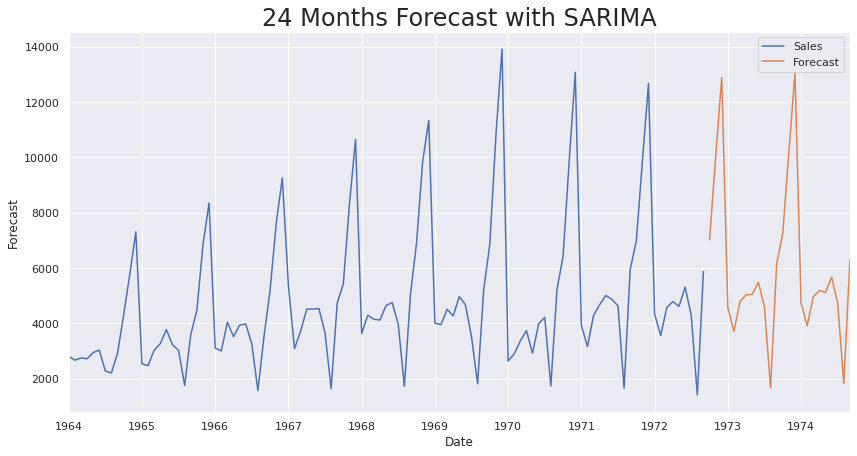

In [ ]:
pred_uc = results.get_forecast(steps=24)

ax = df.Sales.plot(label='Sales', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Forecast')

plt.title('24 Months Forecast with SARIMA', fontsize=24)
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(pred_uc.predicted_mean).to_csv('fore_sarima.csv')
files.download('fore_sarima.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# LSTM

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
print(len(train_data), ',',len(test_data))

84 , 21


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
import math

dataset = df.values

training_data_len = math.ceil( len(dataset) * 0.8)
training_data_len

84

In [ ]:
scaler.fit_transform(dataset)
scaled_data = scaler.transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)
        print()


x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.11213309, 0.10069583, 0.10733424, 0.10461489, 0.12261057,
       0.12980885, 0.06950332, 0.06390466, 0.12069103, 0.23098456])]
[0.3479964808445973]

[array([0.11213309, 0.10069583, 0.10733424, 0.10461489, 0.12261057,
       0.12980885, 0.06950332, 0.06390466, 0.12069103, 0.23098456]), array([0.10069583, 0.10733424, 0.10461489, 0.12261057, 0.12980885,
       0.06950332, 0.06390466, 0.12069103, 0.23098456, 0.34799648])]
[0.3479964808445973, 0.4718067663760697]



In [ ]:
print(train_data.shape)
print(x_train.shape, y_train.shape)

(84, 1)
(74, 10, 1) (74,)


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(74, 10, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(125, return_sequences=False, input_shape= (x_train.shape[1], 1)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(x_train, y_train, batch_size=1, epochs=300)

Epoch 1/300
74/74 [==============================] - 2s 5ms/step - loss: 0.0521
Epoch 2/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 3/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0436
Epoch 4/300
74/74 [==============================] - 0s 6ms/step - loss: 0.0420
Epoch 5/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0411
Epoch 6/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0409
Epoch 7/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0417
Epoch 8/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0363
Epoch 9/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0355
Epoch 10/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0329
Epoch 11/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0374
Epoch 12/300
74/74 [==============================] - 0s 5ms/step - loss: 0.0332
Epoch 13/300
74/74 [=================

In [ ]:
#Create the testing data set
test_data1 = scaled_data[training_data_len - 10: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = df.values[training_data_len:, :]
for i in range(10, len(test_data1)):
  x_test.append(test_data1[i-10:i, 0])

In [ ]:
#convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(21, 10, 1)

In [ ]:
# Get the models predicted price values
predictions = model_lstm.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
valid

,Sales,Predictions
Month,,
1971-01-01,3934.0,5287.598145
1971-02-01,3162.0,3312.886475
1971-03-01,4286.0,3871.942627
1971-04-01,4676.0,4133.082031
1971-05-01,5010.0,4223.645508
1971-06-01,4874.0,5655.469727
1971-07-01,4633.0,3823.355469
1971-08-01,1659.0,1882.101074
1971-09-01,5951.0,5120.187988


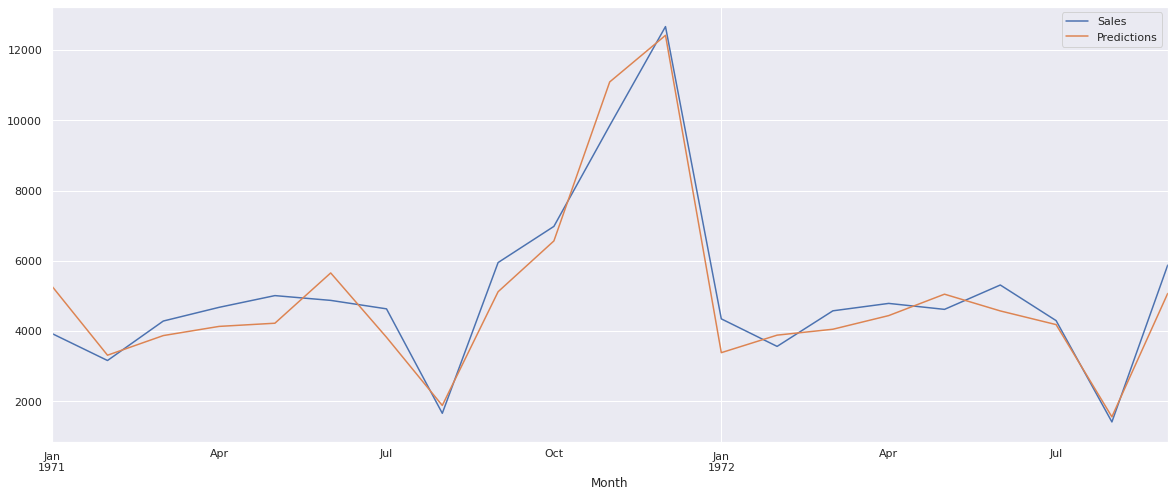

In [ ]:
valid.plot(figsize=(20,8))

In [ ]:
valid.to_csv('pred_lstm.csv')
files.download('pred_lstm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LR_MAPE = round(mape(test_data['Sales'], valid.Predictions), 2)
print("MAPE Data Testing with LSTM: ",LR_MAPE, '%')

MAPE Data Testing with LSTM:  12.25 %


In [ ]:
rmse_lstm = round(rmse(test_data['Sales'], valid.Predictions), 2)
print("RMSE Data Testing with LSTM: ",rmse_lstm)

RMSE Data Testing with LSTM:  674.87


In [ ]:
predictions = []
first_eval_batch = train_data[-10: ]
crntbatch = first_eval_batch.reshape((1, 10, 1))
for i in range():
  crntpred = model_lstm.predict(crntbatch)[0]
  predictions.append(crntpred)
  crntbatch = np.append(crntbatch[: ,1:,:], [[crntpred]],axis=1)

In [ ]:
df2 = pd.DataFrame(pred_uc.predicted_mean.index)
df2.columns = ['date']
df2

,date
0,1972-10-01
1,1972-11-01
2,1972-12-01
3,1973-01-01
4,1973-02-01
5,1973-03-01
6,1973-04-01
7,1973-05-01
8,1973-06-01
9,1973-07-01


In [ ]:
true_predictions = scaler.inverse_transform(predictions)

In [ ]:
df2['pred'] = true_predictions
df2

,date,pred
0,1972-10-01,6042.093988
1,1972-11-01,3671.659445
2,1972-12-01,4009.188031
3,1973-01-01,3775.642160
4,1973-02-01,4096.243994
5,1973-03-01,4300.513794
6,1973-04-01,4069.694931
7,1973-05-01,1020.100594
8,1973-06-01,4968.601138
9,1973-07-01,5131.796835


In [ ]:
df2.set_index('date', inplace = True)

In [ ]:
df2

,pred
date,
1972-10-01,6042.093988
1972-11-01,3671.659445
1972-12-01,4009.188031
1973-01-01,3775.642160
1973-02-01,4096.243994
1973-03-01,4300.513794
1973-04-01,4069.694931
1973-05-01,1020.100594
1973-06-01,4968.601138


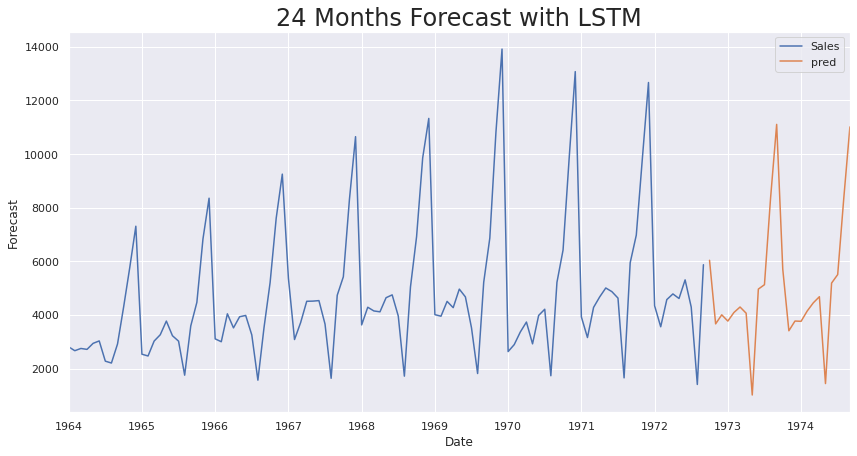

In [ ]:
pred_uc = results.get_forecast(steps=24)

ax = df.Sales.plot(label='Sales', figsize=(14, 7))
df2.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Forecast')

plt.title('24 Months Forecast with LSTM', fontsize=24)
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df2).to_csv('fore_lstm.csv')
files.download('fore_lstm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>